In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Import Data 
path = '/Users/Administrator/Desktop/'
file = pd.read_csv(path + 'term-deposit-marketing-2020.csv')
DF = pd.DataFrame(file)
#displaying data
DF.head(36)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


# Exploring the dataset

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


No missing values

In [4]:
DF.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

# Exploring Data Relations

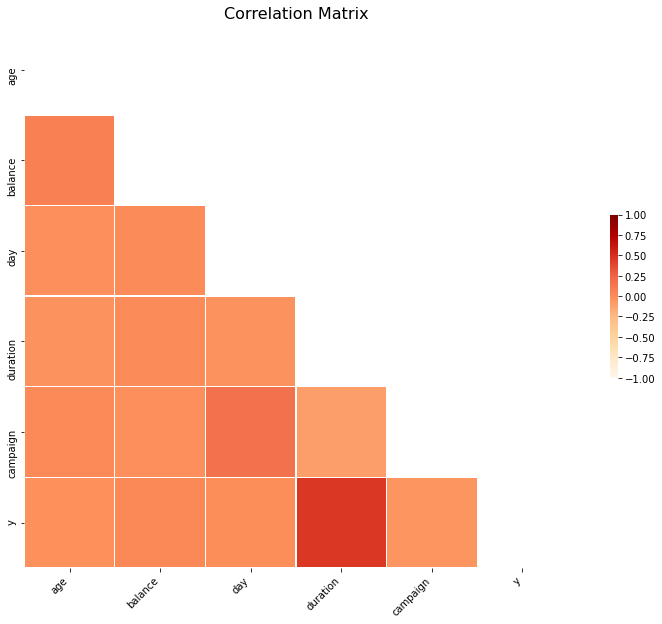

In [34]:
plt.figure(figsize=(15,10))

corr = DF.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,
cmap='OrRd',
    #cmap=sns.diverging_palette(250, 15, s=75, l=40,
   #         n=9, center="dark"),
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3}, 
  
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

Duration is clearly related to Subscription

# Preprocessing Data for a Model

In [3]:
y = DF['y']

In [4]:
ynumbs= []
for i in y: 
    if i == 'yes': 
       ynumbs.append(1) 
    elif i == 'no': 
       ynumbs.append(0) 

In [5]:
DF['y'] = ynumbs

In [6]:
DF['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [8]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [7]:



Xfeutures = DF.loc[:,DF.columns!='y']
#Xtocat = X.drop(['y','balance','duration','age','day','campaign'], axis= 1)
from sklearn.preprocessing import OneHotEncoder
dfcat = Xfeutures.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transdf = enc.fit_transform(dfcat)

In [54]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scaledf = MinMaxScaler()
scaledf.fit(DF[['duration','balance']])
scaled = scaledf.transform(DF[['duration','balance']])
DF[['duration','balance']] = DataFrame(scaled)
DFscaleonly = DF.drop(['job','marital','education','default','housing','loan','contact','month','y'], axis= 1)
DFscaleonly

,age,balance,day,duration,campaign
0,58,0.092259,5,0.053070,1
1,44,0.073067,5,0.030704,1
2,33,0.072822,5,0.015453,1
3,47,0.086476,5,0.018707,1
4,33,0.072812,5,0.040260,1
...,...,...,...,...,...
39995,53,0.076390,3,0.021757,1
39996,30,0.103127,3,0.048394,3
39997,54,0.074619,3,0.034567,1
39998,34,0.082309,3,0.069540,1


In [55]:
bigdf = pd.concat([DFscaleonly, pd.DataFrame(X_transdf)], axis=1)
bigdf

,age,balance,day,duration,campaign,0,1,2,3,4,...,29,30,31,32,33,34,35,36,37,38
0,58,0.092259,5,0.053070,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,0.073067,5,0.030704,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,0.072822,5,0.015453,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,0.086476,5,0.018707,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,33,0.072812,5,0.040260,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0.076390,3,0.021757,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39996,30,0.103127,3,0.048394,3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39997,54,0.074619,3,0.034567,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39998,34,0.082309,3,0.069540,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
Xfeutures = DF.loc[:,DF.columns!='y']
#dfcat = Xfeutures.select_dtypes(include ='object') 
encdf = pd.get_dummies(Xfeutures)
encdf

,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0.092259,5,0.053070,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,0.073067,5,0.030704,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0.072822,5,0.015453,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0.086476,5,0.018707,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,0.072812,5,0.040260,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0.076390,3,0.021757,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,0.103127,3,0.048394,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
39997,54,0.074619,3,0.034567,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,0.082309,3,0.069540,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [56]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bigdf, ynumbs, test_size=0.3)

In [57]:
# transform the dataset
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 25966, 1: 25966})


In [12]:
#LightGBM model
import lightgbm

In [59]:
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.963 (0.002)


In [60]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred 

array([0, 0, 0, ..., 0, 1, 0])

In [61]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [62]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
n_HP_points_to_test = 10
gs = RandomizedSearchCV(
    estimator=model, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,    
    random_state=42,
    verbose=True)

In [64]:
gs.fit(X_train, y_train , early_stopping_rounds = 5, eval_set=[(X_test, y_test)], verbose=False)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CA16CC3250>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CA1866E610>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CA18CE8DF0>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                  

In [65]:
y_pred = gs.predict(X_test)

y_pred 

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gs.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gs.score(X_test, y_test)))

Training set score: 0.9964
Test set score: 0.9457


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10721   417]
 [  376   486]]

True Positives(TP) =  10721

True Negatives(TN) =  486

False Positives(FP) =  417

False Negatives(FN) =  376


In [68]:
from sklearn.metrics import classification_report
predictiontrain = gs.predict(X_train)

print(classification_report(y_train, predictiontrain))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25966
           1       0.97      0.97      0.97     25966

    accuracy                           0.97     51932
   macro avg       0.97      0.97      0.97     51932
weighted avg       0.97      0.97      0.97     51932



In [69]:
from sklearn.metrics import classification_report
predictiontrain = gs.predict(X_test)

print(classification_report(y_test, predictiontrain))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11138
           1       0.54      0.56      0.55       862

    accuracy                           0.93     12000
   macro avg       0.75      0.76      0.76     12000
weighted avg       0.94      0.93      0.93     12000



In [70]:
gs.best_params_

{'colsample_bytree': 0.8532168461905915,
 'min_child_samples': 489,
 'min_child_weight': 10.0,
 'num_leaves': 47,
 'reg_alpha': 2,
 'reg_lambda': 20,
 'subsample': 0.22505063396444688}

In [71]:
best_model = gs.best_estimator_
best_model

LGBMClassifier(colsample_bytree=0.8532168461905915, min_child_samples=489,
               min_child_weight=10.0, num_leaves=47, reg_alpha=2, reg_lambda=20,
               subsample=0.22505063396444688)

# Tuning and Performing a Model

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [13]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfclf = RandomForestClassifier(max_depth=10)
# Random search of parameters, using 3 fold cross validation, 
# search across  different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfclf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [14]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [15]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, max_depth=90, n_estimators=1000)

# Model Performance

In [55]:
from sklearn.metrics import classification_report
predictiontrain = best_random.predict(X_train)

print(classification_report(y_train, predictiontrain))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     25997
           1       0.86      0.79      0.82     25997

    accuracy                           0.83     51994
   macro avg       0.83      0.83      0.83     51994
weighted avg       0.83      0.83      0.83     51994



In [56]:
from sklearn.metrics import classification_report
predictiontest = best_random.predict(X_test)

print(classification_report(y_test, predictiontest))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11107
           1       0.16      0.32      0.21       893

    accuracy                           0.82     12000
   macro avg       0.55      0.59      0.56     12000
weighted avg       0.88      0.82      0.85     12000



In [72]:
DF = DF[:12000]

In [63]:
DF.insert(14, 'Predicted', Pred)

In [64]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,Predicted,cluster
0,58,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,1,0,0,4.0
1,44,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,1,0,0,1.0
2,33,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,1,0,0,4.0
3,47,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,1,0,0,4.0
4,33,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,1,0,1,3.0


In [65]:
importance = best_random.feature_importances_[:13]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03195
Feature: 1, Score: 0.03898
Feature: 2, Score: 0.01917
Feature: 3, Score: 0.01513
Feature: 4, Score: 0.03942
Feature: 5, Score: 0.01736
Feature: 6, Score: 0.02072
Feature: 7, Score: 0.03153
Feature: 8, Score: 0.01007
Feature: 9, Score: 0.03267
Feature: 10, Score: 0.01904
Feature: 11, Score: 0.00539
Feature: 12, Score: 0.02413


# Plotting Features Rates

<BarContainer object of 13 artists>

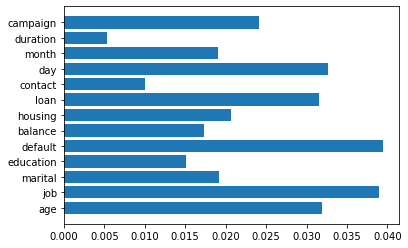

In [66]:
index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']
dsetfeat = pd.DataFrame(DF, index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],  columns=index)
plt.barh(dsetfeat.index, best_random.feature_importances_[:13])

# Confusion Matrix  on a Test Set

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


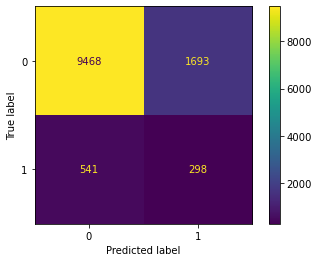

In [35]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_random, X_test, y_test)  
plt.show() 

298 True Positive, 541 False Negative from Subscribed Customers

# Unsupervised Clustering Kmeans Who Will Subscribe what makes people buy a product


Data Preprocessing

Selecting only Subscribed Customers

In [73]:
df_mask=DF['y']==1
filtered_df = DF[df_mask]
filtered_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,0.094075,yes,no,unknown,5,may,0.211875,1,1
86,56,admin,married,secondary,no,0.073212,no,no,unknown,5,may,0.298292,1,1
87,41,technician,married,secondary,no,0.084334,yes,no,unknown,5,may,0.282432,1,1
129,55,services,married,secondary,no,0.095283,yes,no,unknown,5,may,0.117731,1,1
168,54,admin,married,tertiary,no,0.074474,no,no,unknown,5,may,0.136844,2,1


In [74]:
Xdf = filtered_df.drop(['y','balance','duration','age','day','campaign'], axis= 1)


In [75]:
Xdf

,job,marital,education,default,housing,loan,contact,month
83,admin,married,secondary,no,yes,no,unknown,may
86,admin,married,secondary,no,no,no,unknown,may
87,technician,married,secondary,no,yes,no,unknown,may
129,services,married,secondary,no,yes,no,unknown,may
168,admin,married,tertiary,no,no,no,unknown,may
...,...,...,...,...,...,...,...,...
11859,blue-collar,married,secondary,no,yes,yes,unknown,jun
11865,blue-collar,single,tertiary,no,yes,no,unknown,jun
11977,services,divorced,secondary,no,no,no,unknown,jun
11985,services,divorced,secondary,no,no,no,unknown,jun


In [76]:
encdf = OneHotEncoder(sparse=False)
Xdf = encdf.fit_transform(Xdf[['job','marital','education','default','housing','loan','contact','month']])
Xdf


array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [77]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scalerdf = MinMaxScaler()
scalerdf.fit(DF[['duration','balance']])
DFscaled = scalerdf.transform(DF[['duration','balance']])
filtered_df[['duration','balance']] = DataFrame(DFscaled)

filtered_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,0.092302,yes,no,unknown,5,may,0.268488,1,1
86,56,admin,married,secondary,no,0.055188,no,no,unknown,5,may,0.377995,1,1
87,41,technician,married,secondary,no,0.074973,yes,no,unknown,5,may,0.357897,1,1
129,55,services,married,secondary,no,0.094451,yes,no,unknown,5,may,0.149188,1,1
168,54,admin,married,tertiary,no,0.057433,no,no,unknown,5,may,0.173409,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859,40,blue-collar,married,secondary,no,0.057497,yes,yes,unknown,20,jun,0.146869,2,1
11865,38,blue-collar,single,tertiary,no,0.101056,yes,no,unknown,20,jun,0.366400,10,1
11977,46,services,divorced,secondary,no,0.054461,no,no,unknown,20,jun,0.263592,3,1
11985,49,services,divorced,secondary,no,0.069756,no,no,unknown,20,jun,0.208194,2,1


In [79]:
newdf = pd.DataFrame(Xdf, filtered_df)  
newdf

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
"(59, admin, married, secondary, no, 0.09230247432004654, yes, no, unknown, 5, may, 0.2684875032208194, 1, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
"(56, admin, married, secondary, no, 0.055187673622327044, no, no, unknown, 5, may, 0.37799536202009787, 1, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
"(41, technician, married, secondary, no, 0.07497254344595905, yes, no, unknown, 5, may, 0.3578974491110538, 1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
"(55, services, married, secondary, no, 0.09445054590089799, yes, no, unknown, 5, may, 0.14918835351713475, 1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
"(54, admin, married, tertiary, no, 0.05743265068802894, no, no, unknown, 5, may, 0.173408915228034, 2, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(40, blue-collar, married, secondary, no, 0.057497254344595905, yes, yes, unknown, 20, jun, 0.1468693635660912, 2, 1)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
"(38, blue-collar, single, tertiary, no, 0.10105626978486984, yes, no, unknown, 20, jun, 0.3664004122648802, 10, 1)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
"(46, services, divorced, secondary, no, 0.054460882485948714, no, no, unknown, 20, jun, 0.2635918577686163, 3, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
"(49, services, divorced, secondary, no, 0.0697557981781769, no, no, unknown, 20, jun, 0.2081937644936872, 2, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


Selectig Number of Clusters

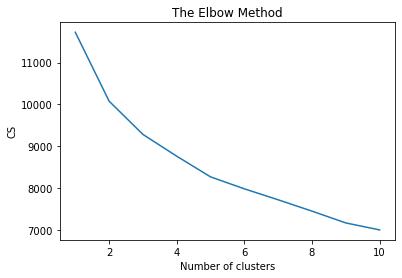

In [22]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(newdf)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Number of Clusters is 5 but it gave more error data points than 4  so I selected 4 clusters.

Applying a model.

In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(newdf)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
DF['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(DF.groupby('cluster').mean(),1))
kmeans_mean_cluster

,age,balance,day,duration,campaign,y
cluster,,,,,,
1.0,40.6,0.1,9.1,0.1,2.0,0.0
2.0,41.1,0.1,8.7,0.1,2.0,0.0
3.0,39.8,0.1,8.6,0.1,2.1,0.0
4.0,40.2,0.1,9.1,0.1,2.1,0.0


In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter=300, random_state=100)
tsne_results = tsne.fit_transform(newdf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2896 samples in 0.130s...
[t-SNE] Computed neighbors for 2896 samples in 1.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2896
[t-SNE] Computed conditional probabilities for sample 2000 / 2896
[t-SNE] Computed conditional probabilities for sample 2896 / 2896
[t-SNE] Mean sigma: 0.305352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.601974
[t-SNE] KL divergence after 300 iterations: 1.458107


In [24]:
labels=np.array(kmeans.labels_)

In [25]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'g',
                   3 : 'b' }

label_color = [LABEL_COLOR_MAP[l] for l in labels]


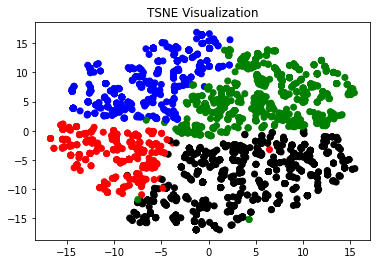

In [71]:
# visualize TSNE
x_axis = tsne_results[:,0]
y_axis = tsne_results[:,1]

plt.scatter(x_axis, y_axis, c=label_color, cmap=plt.cm.get_cmap("jet", 100))

plt.title("TSNE Visualization")
plt.show()


Almost ideally clustered customers data but error data points could be outliers or PCA calculations will probably do a better job than TSNE

# PCA Dimension Reduction Visualization 

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(newdf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,1.391598,-0.208275
1,0.392444,-0.833626
2,1.331406,-0.189335
3,1.391982,-0.190331
4,-0.272089,-0.033658
...,...,...
2891,-0.285839,1.414178
2892,-1.220437,0.421502
2893,0.603367,0.302029
2894,-1.284994,0.788828


No handles with labels found to put in legend.


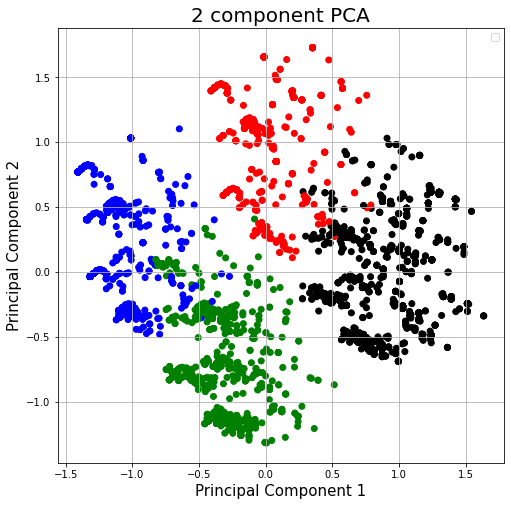

In [29]:
xaxis = principalComponents[:,0]
yaxis = principalComponents[:,1]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

    
ax.scatter(xaxis, yaxis, c=label_color)
ax.legend()
ax.grid()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents3D = pca.fit_transform(newdf)


Dimension Reduction for 3D plot

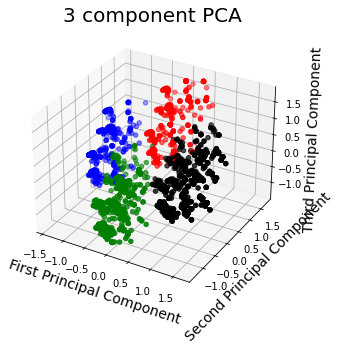

In [43]:

Xax = principalComponents3D[:,0]
Yax = principalComponents3D[:,1]
Zax = principalComponents3D[:,1]



fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')

ax.scatter(Xax, Yax, Zax, c=label_color)
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)
ax.set_title('3 component PCA', fontsize = 20)
plt.show()
    


In [75]:
DF['cluster'].value_counts()

2.0    1032
3.0     812
4.0     620
1.0     432
Name: cluster, dtype: int64

# SHAP Analysis for Exploring Important Features to Explore What Makes Customers to Subscribe

In [80]:
import shap  # package used to calculate Shap values
row_to_show = 13
data_for_prediction = X_test.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
best_model.predict_proba(data_for_prediction_array)

array([[0.99161982, 0.00838018]])

In [81]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model)

In [82]:
shap_values = explainer.shap_values(data_for_prediction_array)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


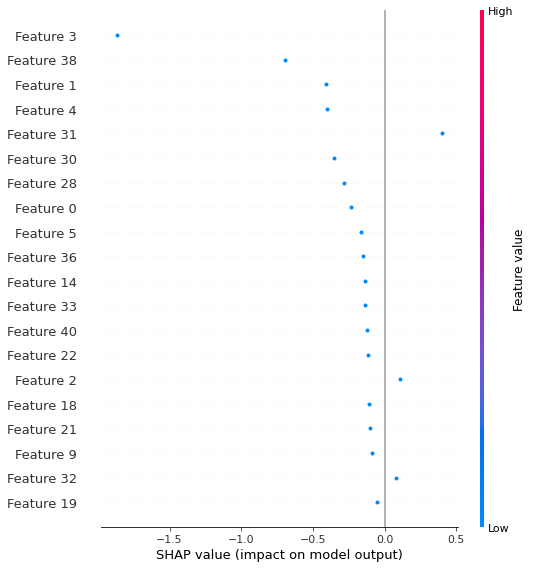

In [84]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], data_for_prediction_array)

Top 8 features are rated as high so  these features makes customers to subscribe or not to subscribe.

In [86]:
encdf.get_feature_names(['3', '38','1','4', '31','30','28', '0'])

array(['3_admin', '3_blue-collar', '3_entrepreneur', '3_housemaid',
       '3_management', '3_retired', '3_self-employed', '3_services',
       '3_student', '3_technician', '3_unemployed', '3_unknown',
       '38_divorced', '38_married', '38_single', '1_primary',
       '1_secondary', '1_tertiary', '1_unknown', '4_no', '4_yes', '31_no',
       '31_yes', '30_no', '30_yes', '28_unknown', '0_jun', '0_may'],
      dtype=object)

These are listed from top to the bottom order : Job, Marital status,  Education, Default, Housing, Loan, Contact, Month

In [88]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)

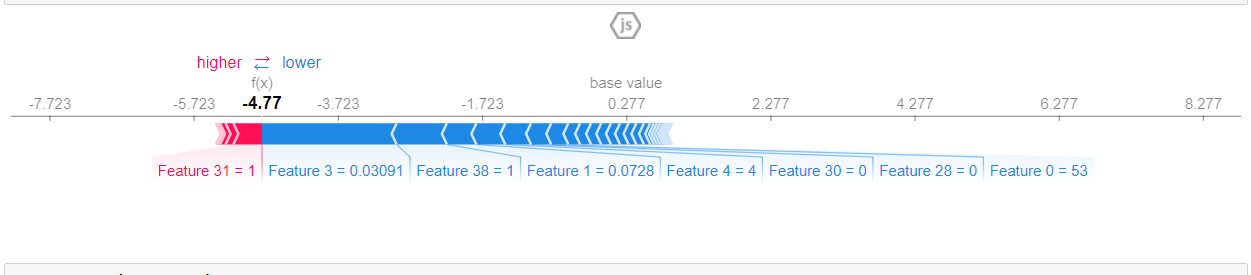

Feature 31 is a Housing

# Conclusion

The dataset was clean and no missing data, though it had to be transformed in encoding and scaling. Answers based on data were found. The answer to the question what makes people subscribe  is found. According to SHAP analysis these are  Job, Marital status, Education, Default, Housing, Loan, Contact, Month. Predictions if the customer will subscribe to a term deposit are made by lightgbm and achieved 93% weighted average accuracy.
Age, Balance, Day, Duration, Campaign are the segments of customers the client should prioritize.   And feature  should be focusing more on is 'Job' as a negative index to the subscription according to two different feature importance analysises.